# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [56]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [57]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Worst experience ever. Outbound...
1,✅ Trip Verified | Check in was a shambles at ...
2,✅ Trip Verified | Beyond disgusted with the fa...
3,✅ Trip Verified | On July 19th 2022 I had subm...
4,✅ Trip Verified | I booked the flight on Oct ...


In [58]:
import re
verified_kat           = df[df.reviews.str.contains('Verified',flags=re.IGNORECASE)]
verified_kat['verify'] = verified_kat.reviews.apply(lambda x: x.split(' |')[0])
print(verified_kat['verify'].unique())
verified_kat['verify'].replace({'Not Verified':'❎ Not Verified','❎ Unverified':'❎ Not Verified'},inplace=True)
verified_kat['verify'].unique()

['Not Verified' '✅ Trip Verified' '❎ Not Verified' '✅ Verified Review'
 '❎ Unverified']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23112\373399863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_kat['verify'] = verified_kat.reviews.apply(lambda x: x.split(' |')[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23112\373399863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_kat['verify'].replace({'Not Verified':'❎ Not Verified','❎ Unverified':'❎ Not Verified'},inplace=True)


array(['❎ Not Verified', '✅ Trip Verified', '✅ Verified Review'],
      dtype=object)

c:\Anac_Pack\ML\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10062 (\N{NEGATIVE SQUARED CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anac_Pack\ML\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


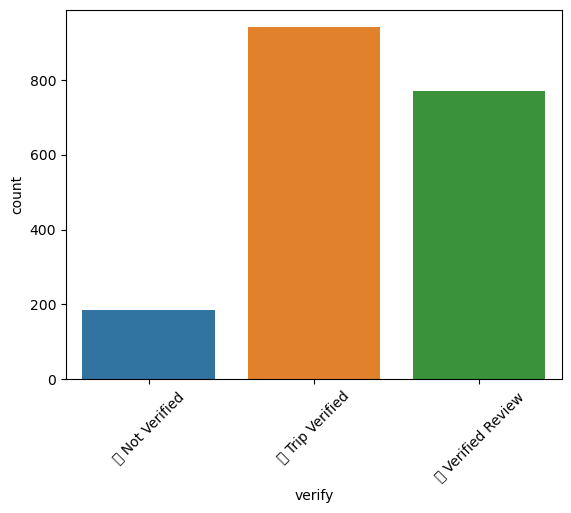

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='verify',data=verified_kat)
plt.xticks(rotation=45)
plt.show()

In [60]:
df.reviews = df.reviews.str.replace('(.*) \|','',regex=True)
df.reviews = df.reviews.str.strip()

In [61]:
import os
os.makedirs('data', exist_ok=True)
df.to_csv("data/BA_reviews.csv")
verified_kat.to_csv("data/BA_cat_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [64]:
print('All Verified',df.shape)
print('Category Verified',verified_kat.shape)

All Verified (3418, 1)
Category Verified (1894, 2)
